**Title: Star Classification**

**Introduction**

There are billions of stars in our sky and every star is unique. There are brown, white, and red dwarfs, main sequence stars like the sun and also hyper and super giants. Each of these star types has unique characteristics which can be used to classify their type. Astronomers typically use features such as the stars Luminosity, Radius, and Temperature to determine its type. In this data analysis, we will look at a star dataset which includes features of 240 stars which includes 40 stars from each of the 6 categories. The features of stars this dataset includes is the surface temperature in Kelvins, the luminosity in solar luminosity, radius in solar radius, visual magnitude (How bright the star appears from a distance of 10 Kpc), star type, star colour, and stellar class. Luminosity is the amount of energy generated per second by the star and is given in stellar units. This means that a luminosity of 100 means 100 times more luminous than the sun. The radius is also how big it is in stellar units, and a radius of 10 means 10 times bigger than the sun. Researchers have used the Hertzsprung-Russell Diagram (A plot of Luminosity vs. Temperature) to plot star features in order to determine a star’s type. To further our understanding of this diagram, we want to utilize k-nn classification to imitate aspects of the diagram and predict a new star’s type. The question we will address is whether we can build a model which effectively, consistently, and accurately classifies a new star’s type using k-nn classification to classify stars based on it's luminosity, radius, and temperature. 


**Methods & Results**

In this data analysis, the plan is to build a model using temperature, radius, and luminosity. To start off we will set our seed value (2022) and load in all the libraries we need for this data analysis

In [23]:
#Load all libraries and set plot dimensions
set.seed(2022)
options(repr.plot.height = 8, repr.plot.width = 10)
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

**Load Dataset**

Now we need to load in our dataset and analyze it by looking at first 6 and last 6 observations using tail and head functions. 

In [26]:
#Load data frame and changed the column names to more convenient
url <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vR0bAqJh1jznOVyOZbHPL3kLbFjX6YzCWwMh3vMZEeBZq95tdDfcN9vqDP6XUf2j167vXr4oxnDvhb4/pub?gid=1536482276&single=true&output=csv"
star <- read_csv(url)

head(star)
tail(star)

Parsed with column specification:
cols(
  `Temperature (K)` = col_double(),
  `Luminosity(L/Lo)` = col_double(),
  `Radius(R/Ro)` = col_double(),
  `Absolute magnitude(Mv)` = col_double(),
  `Star type` = col_double(),
  `Star color` = col_character(),
  `Spectral Class` = col_character()
)



Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3068,0.002400,0.1700,16.12,0,Red,M
3042,0.000500,0.1542,16.60,0,Red,M
2600,0.000300,0.1020,18.70,0,Red,M
2800,0.000200,0.1600,16.65,0,Red,M
1939,0.000138,0.1030,20.06,0,Red,M
2840,0.000650,0.1100,16.98,0,Red,M


Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
21904,748490,1130,-7.67,5,Blue-white,B
38940,374830,1356,-9.93,5,Blue,O
30839,834042,1194,-10.63,5,Blue,O
8829,537493,1423,-10.73,5,White,A
9235,404940,1112,-11.23,5,White,A
37882,294903,1783,-7.80,5,Blue,O


**Clean and Wrangle Dataset**

Looking at the dataset, the column names have spaces so it would be a good idea to rename the columns to more convenient names, to make it more convenient to use with functions such as mutate and filter. We also want to change the type of the variable we are trying to classify which is star_type to a factor. The person who created the dataset decided to map the star type in star_type column as a number. They mapped Brown Dwarfs as 0, Red Dwarfs as 1, White Dwarfs as 2, Main Sequence stars as 3, Super giants as 4, and Hyper Giants as 5. To make our data analysis easier to understand we will map the star types back to their actual name. Lastly, judging from these two tables it seems like it would be a great idea to apply the log10 function to our predictors which are luminosity, radius, and temperature because the smallest values and largest values of these variables differ by a very significant amount. For example the lowest values for luminosity are a lot smaller than 1 while the largest values are greater than 100,000 so for the purpose of this data analysis since applying log10 function to each individual predictor will only decrease the amount each value varies by in respect to each other and won't impact relationship between values of other predictor, applying log10 will not impact our results for the data analysis and will make our values simpler to work with and visualize. So lets apply all these changes. 

In [30]:
#Rename columns to more convenient name
star_data <- star %>% 
    rename(star_type = "Star type",
           star_color = "Star color",
           spectral_class = "Spectral Class",
           temperature = "Temperature (K)",
           radius = "Radius(R/Ro)",
           luminosity = "Luminosity(L/Lo)",
           absolute_magnitude = "Absolute magnitude(Mv)") %>%
    tibble()


#Renamed numerical values of star type to their actual name 
star_data$star_type[star_data$star_type == 0] <- "Brown Dwarf"
star_data$star_type[star_data$star_type == 1] <- "Red Dwarf"
star_data$star_type[star_data$star_type == 2] <- "White Dwarf"
star_data$star_type[star_data$star_type == 3] <- "Main Sequence"
star_data$star_type[star_data$star_type == 4] <- "Super Giant"
star_data$star_type[star_data$star_type == 5] <- "Hyper Giant"

#Changed star_type to a factor and also applied log10 function to all predictors
star_data <- star_data %>%
    mutate(star_type = as_factor(star_type),
          luminosity = log10(luminosity),
          radius = log10(radius),
          temperature = log10(temperature))

sample_n(star_data, 6)

temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
4.038620,5.894277,1.3979400,-6.224,Super Giant,Blue,O
4.082785,5.079181,2.8505850,-7.840,Hyper Giant,Blue-white,B
4.299289,-2.806875,-1.8477117,11.340,White Dwarf,Blue,B
3.562293,5.491362,3.1218880,-7.790,Hyper Giant,Red,M
3.550228,-2.397940,-0.5361070,10.890,Red Dwarf,Red,M
3.556061,-2.568636,-0.1739252,13.667,Red Dwarf,Red,M


Since we will be performing a knn classification, before doing any exploratory data analysis of our data we only want access to the training dataset and hide the test dataset. So lets split our dataset by using 60% of original dataset for the training set and 40% for the test set so we can have a fairly good balance between building an accurate model and have a large enough test dataset so we can get a precise accuracy for our model. 

In [31]:
#Split the data into a training set and testing set 
star_split <- initial_split(star_data, prop = 0.6, strata = star_type)
star_train <- training(star_split)
star_test <- testing(star_split)

**Exploratory Data Analysis: Dataset Summary**

Now that the dataset has been split into a training and testing dataset, lets summarize our dataset by looking at the average temperature, average density, and average radius for each star type, as well as the number of stars included for each star type. 

In [32]:
#Plot indicating the number of observations in each star type and averages of all predictor variables
star_distribution <- star_train %>%
    select(temperature, radius, luminosity, star_type) %>%
    group_by(star_type) %>%
    summarize(stars_in_class = n(), luminosity_avg = mean(luminosity), radius_avg = mean(radius), temperature_avg = mean(temperature))
star_distribution

`summarise()` ungrouping output (override with `.groups` argument)



star_type,stars_in_class,luminosity_avg,radius_avg,temperature_avg
<fct>,<int>,<dbl>,<dbl>,<dbl>
Brown Dwarf,24,-3.314059,-0.9897183,3.483097
Red Dwarf,24,-2.648619,-0.4790230,3.518066
White Dwarf,24,-3.273863,-1.9706001,4.087706
Main Sequence,24,1.826812,0.3704658,4.025569
Super Giant,24,5.415769,1.6189840,4.013144
Hyper Giant,24,5.441895,3.1282574,3.924904


**Table 1**

We can see from Table 1 that there are 24 stars from each star type included and brown dwarfs have the lowest luminosity value on average and Hyper giants have the largest luminosity value, White dwarfs have the smallest average radius and Hyper Giants have the largest average radius, and Brown Dwarfs have the lowest temperature average and White dwarfs have the highest temperature average. Judging from the low variability of temperature for the different star types, it may not be as good of a predictor for star type in comparison to Luminosity and Radius since their average values vary more between star types.  

**Exploratory Data Analysis: Visualizations**

Now we will create three different visualizations to visualize the relationships between all the predictors and since we suspect that temperature might not be the best predictor for star type, we will create a histogram which shows the distribution temperature for all the star types. This will help us gain a better understanding of dataset and guide us in building the best model. 

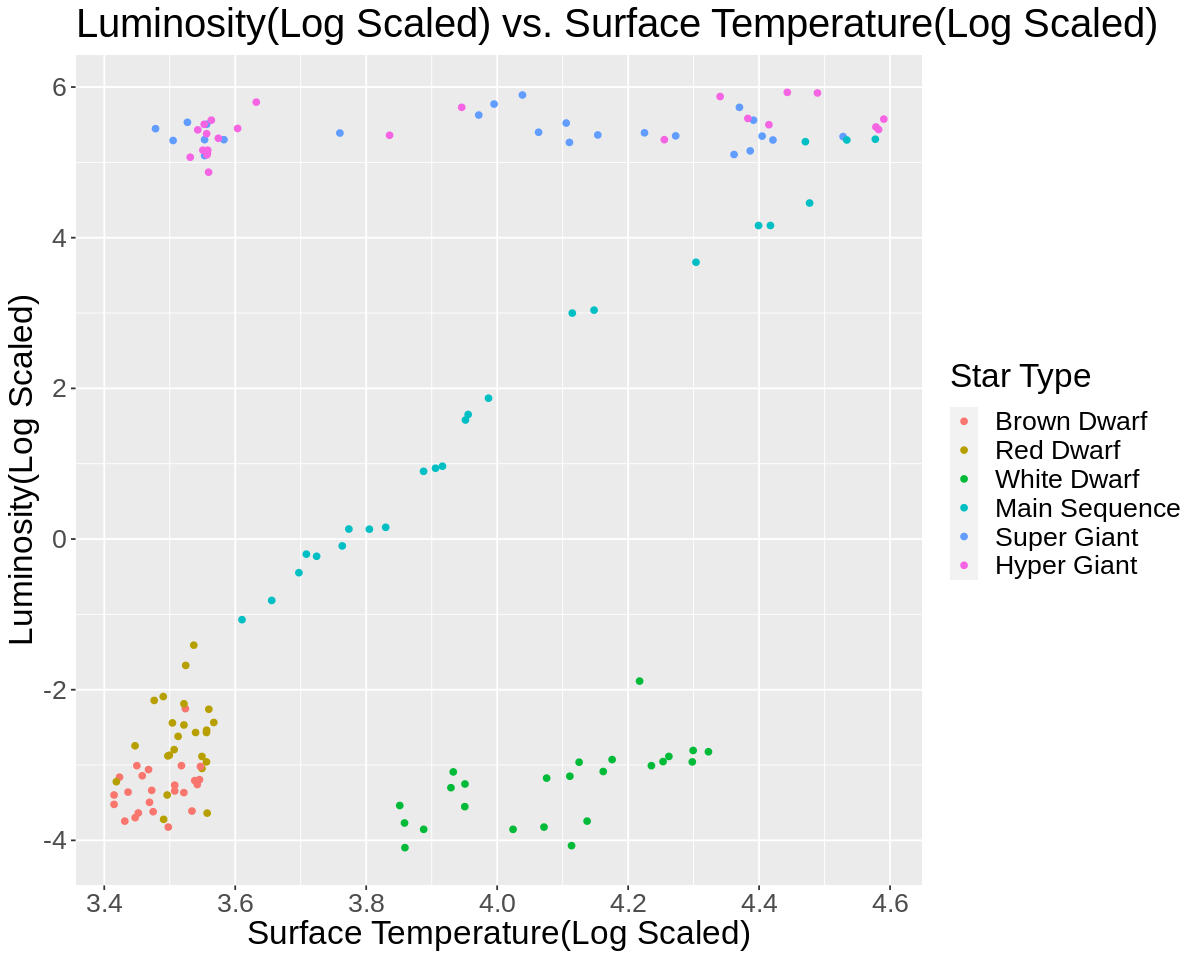

In [35]:
#Visualization of Luminosity vs. Temperature
star_plot <- star_train %>%
    ggplot(aes(x = temperature, y = luminosity, color = star_type)) + 
    geom_point() +
    ggtitle("Luminosity(Log Scaled) vs. Surface Temperature(Log Scaled)") +
    labs(x = "Surface Temperature(Log Scaled)", y = "Luminosity(Log Scaled)", color = "Star Type") +
    theme(text = element_text(size = 20))

star_plot 

Luminosity and temperature seems to have a multiple relationships going on. For Main Sequence Stars, Red dwarfs, and Brown dwarfs, there is a strong positive linear relationship and there seems to be a moderate positive relationship for White Dwarfs and Hyper Giants and Super Giants don't have a relationship at all. 

**Figure 1**

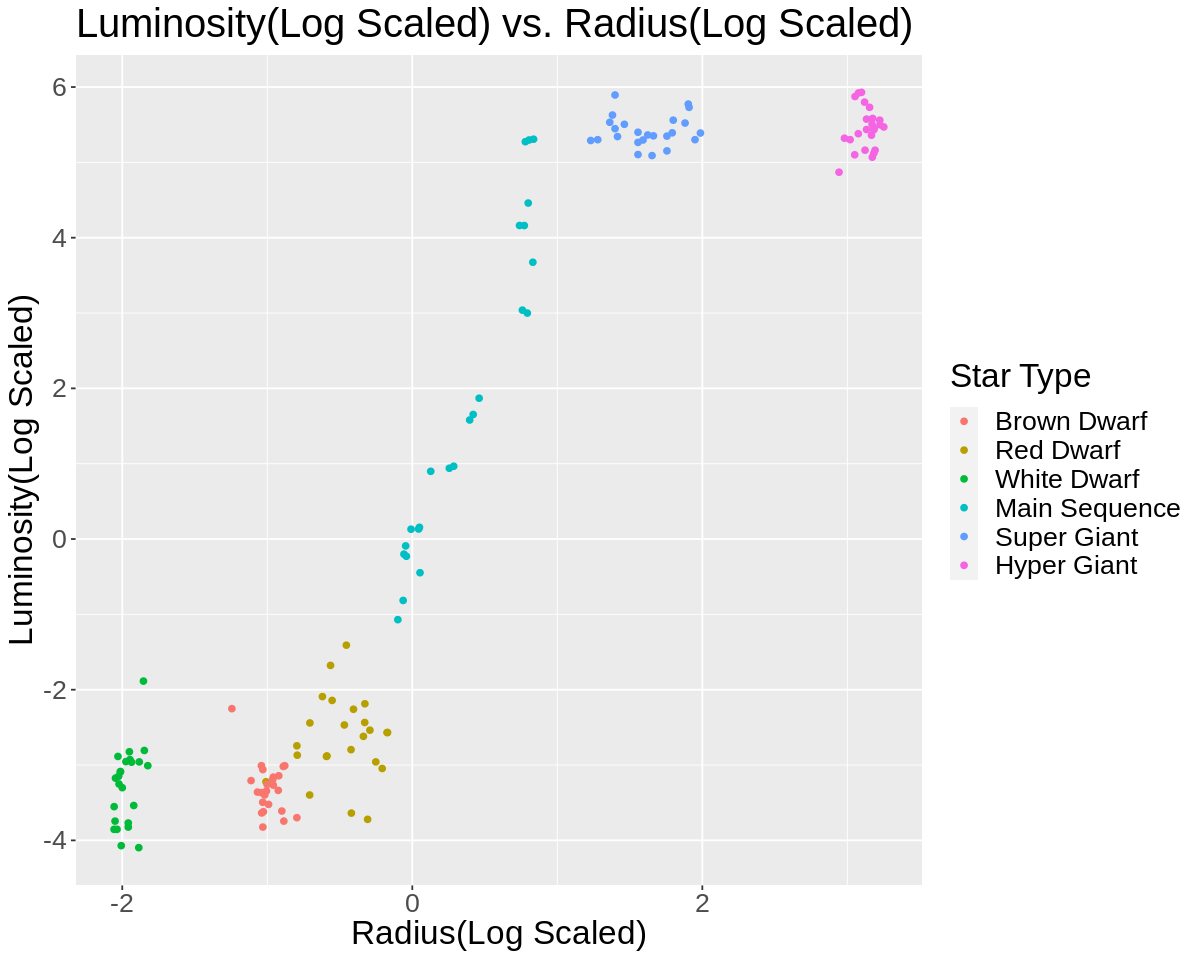

In [36]:
#Visualization of Luminosity vs. Radius
star_plot_2 <- star_train %>%
    ggplot(aes(x = radius, y = luminosity, color = star_type)) + 
    geom_point() +
    ggtitle("Luminosity(Log Scaled) vs. Radius(Log Scaled)") +
    labs(x = "Radius(Log Scaled)", y = "Luminosity(Log Scaled)", color = "Star Type") +
    theme(text = element_text(size = 20))

star_plot_2

Luminosity and Radius have a strong positive non-linear relationship

**Figure 2**

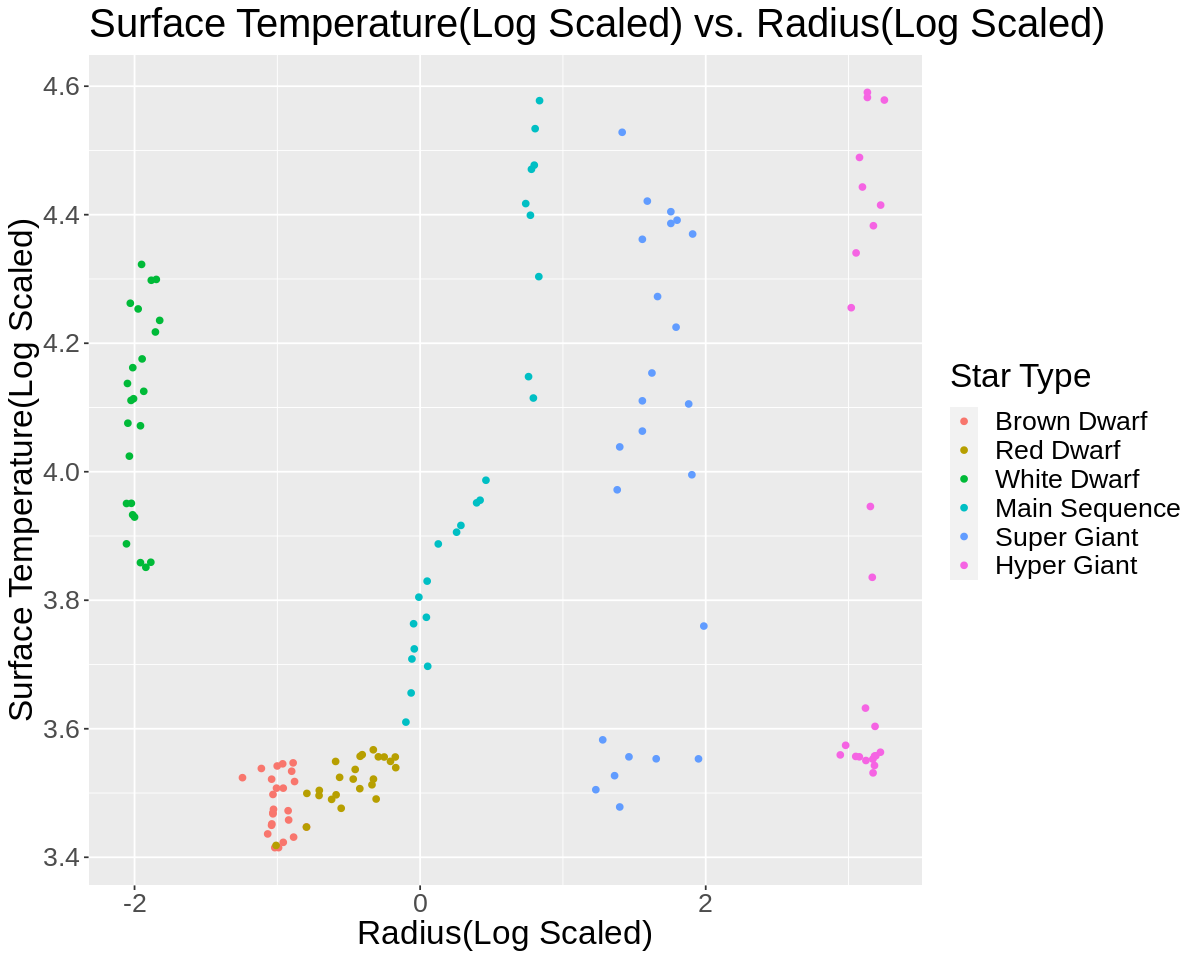

In [37]:
#Visualization of Temperature vs. Radius
star_plot_3 <- star_train %>%
    ggplot(aes(x = radius, y = temperature, color = star_type)) + 
    geom_point() +
    ggtitle("Surface Temperature(Log Scaled) vs. Radius(Log Scaled)") +
    labs(x = "Radius(Log Scaled)", y = "Surface Temperature(Log Scaled)", color = "Star Type") +
    theme(text = element_text(size = 20))

star_plot_3

**Figure 3**

Based off of figure 3, there is a Strong positive non-linear relationship between Temperature and Radius for Brown Dwarfs, Red Dwarfs, and Main Sequence stars but no relationship for the rest of the star types.

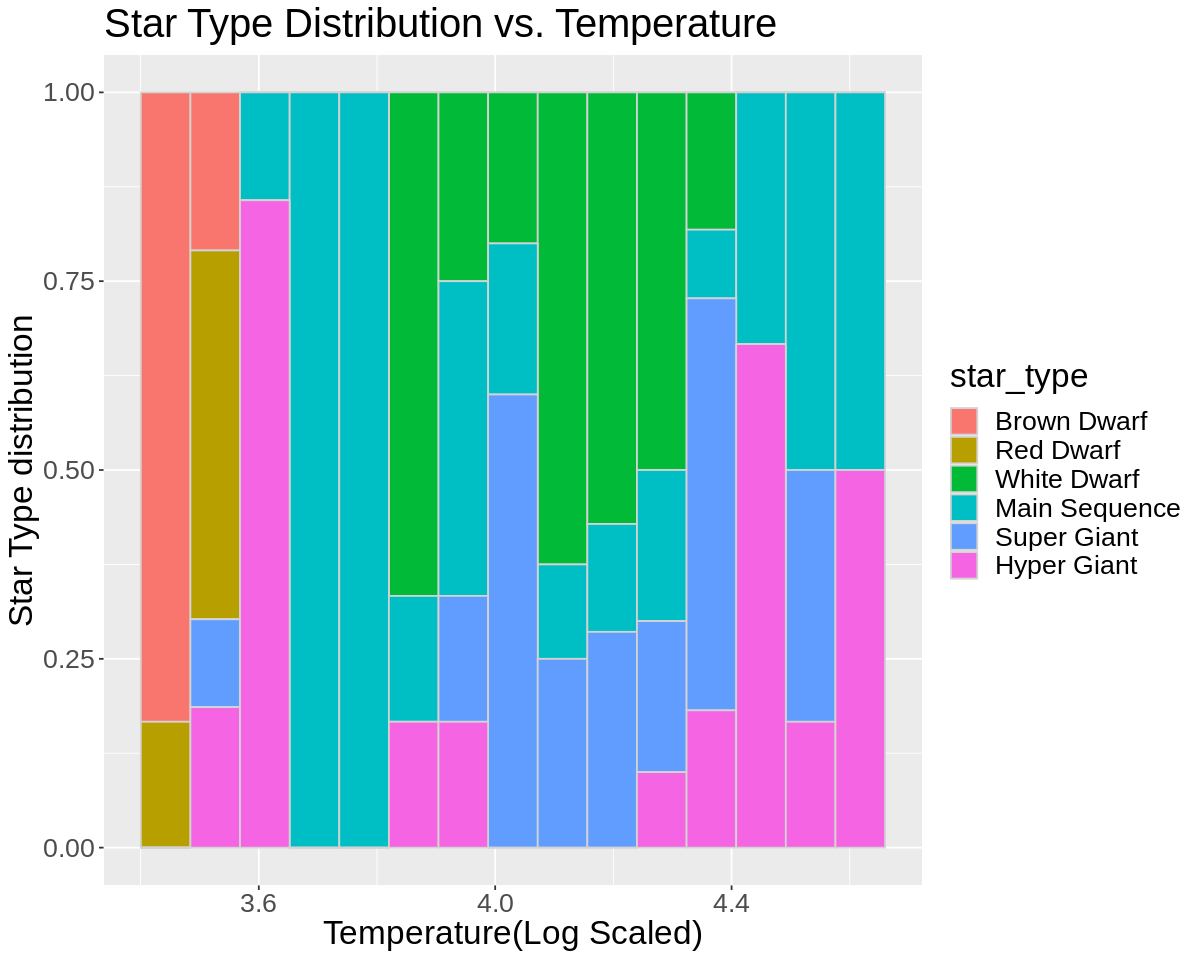

In [7]:
#Plot to see distribution of star type and temperature
star_temp_plot <- star_train %>%
    ggplot(aes(x = temperature, fill = star_type)) +
    geom_histogram(position = "fill", color = "lightgrey", bins = 15) +
    ggtitle("Star Type Distribution vs. Temperature") +
    labs(x = "Temperature(Log Scaled)", y = "Star Type distribution", color = "Star Type") +
    theme(text = element_text(size = 20))

star_temp_plot

**Figure 4**

Based off of Figure 4, there is too much star type variability for temperature. Temperatures from 3.4 to 3.6 and from around 3.8 to 5 include up to 2-4 different star types.

**Conclusion from Exploratory Data Analysis**

After conducting the exploratory data analysis, based off of Table 1, Figure 1, Figure 3 and 4, we can hypothesize that Temperature may not be the best predictor as it might cause a some observations to be classified incorrectly. However, luminosity and radius seem to be very good predictors. So to start off by building a model by including temperature and then well build a model by excluding temperature and then we will apply cross validation to compare acc

In [8]:
#Star Vfold to apply cross-validation
star_vfold <- vfold_cv(star_train, v = 10, strata = star_type)

#K-nearest neighbor model specification: pre cross-validation
knn_spec_temp <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification") 

#Recipe for star data and standardization
star_recipe_temp <- recipe(star_type ~ radius + luminosity + temperature, data = star_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#Put together everything into a workflow
star_fit_temp <- workflow() %>%
    add_recipe(star_recipe_temp) %>%
    add_model(knn_spec_temp) %>%
    tune_grid(resamples = star_vfold, grid = tibble(neighbors = seq(1,20)))

# #Collect the summary of our cross-validation
star_summary_temp <- star_fit_temp %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

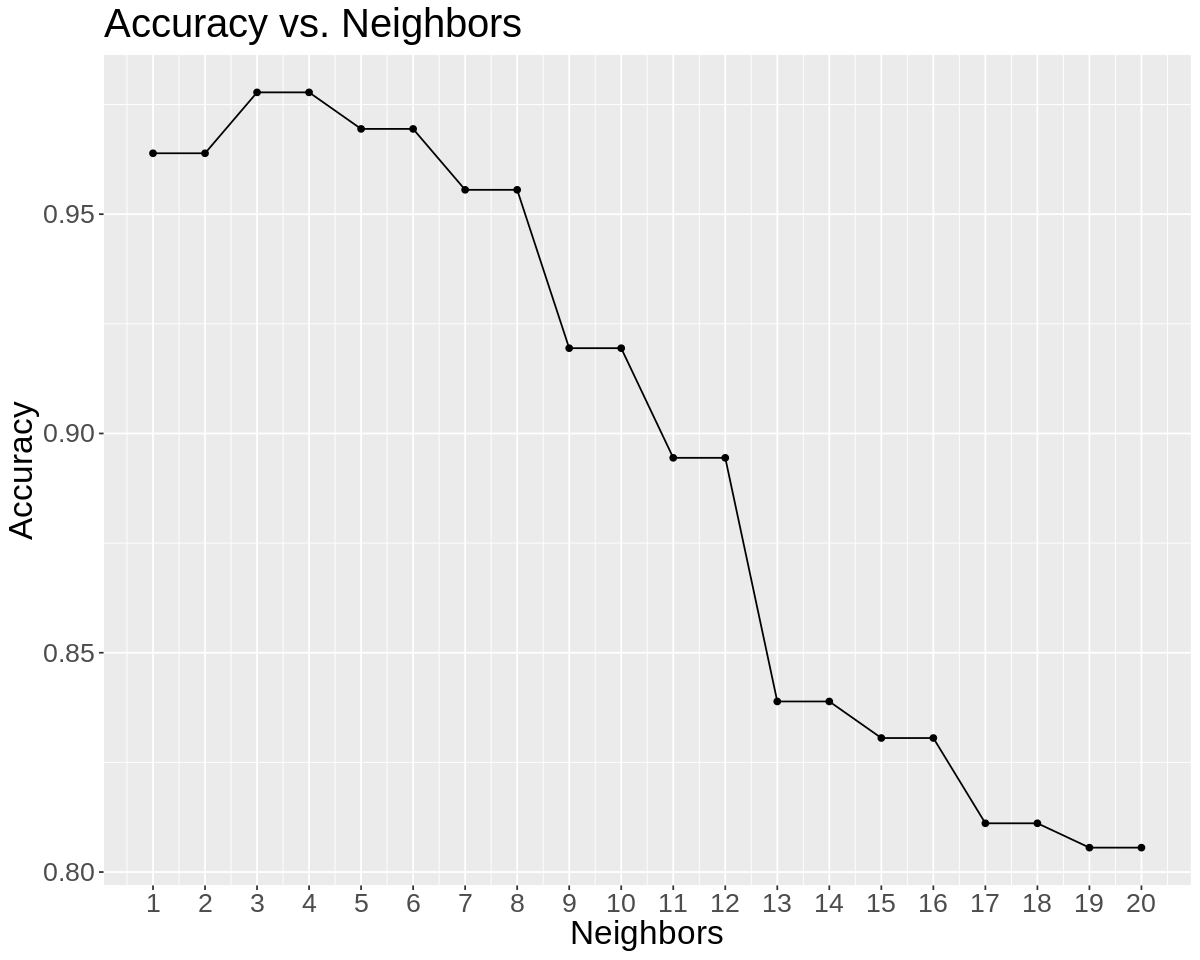

In [9]:
#Plot of accuracy vs. neighbors  
star_accuracy_plot <- star_summary_temp %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() +
    geom_line() +
    ggtitle("Accuracy vs. Neighbors") +
    labs(x = "Neighbors", y = "Accuracy") +
    theme(text = element_text(size = 20)) +
    scale_x_continuous(breaks = 1:20)

star_accuracy_plot

**Figure 5**

In [10]:
#Best K value
k_min <- star_summary_temp %>%
    arrange(desc(mean)) %>% 
    slice(1) %>%
    select(neighbors) %>%
    pull()

k_min

[1] 3

In [11]:
#K-nearest neighbor model specification: pre cross-validation
knn_spec_temp <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
    set_engine("kknn") %>%
    set_mode("classification") 

#Put together everything into a workflow
star_fit_temp <- workflow() %>%
    add_recipe(star_recipe_temp) %>%
    add_model(knn_spec_temp) %>%
    fit_resamples(resamples = star_vfold)

# #Collect the summary of our cross-validation
star_summary_temp <- star_fit_temp %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

star_summary_temp

.metric,.estimator,mean,n,std_err
<chr>,<chr>,<dbl>,<int>,<dbl>
accuracy,multiclass,0.9777778,10,0.01156481


**Table 2**

Our accuracy is quite high with temperature included but we want to test our hypothesis that our model will be better off without including temperature

In [12]:
#K-nearest neighbor model specification: pre cross-validation
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification") 

#Recipe for star data and standardization
star_recipe <- recipe(star_type ~ radius + luminosity, data = star_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#Put together everything into a workflow
star_fit <- workflow() %>%
    add_recipe(star_recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples = star_vfold, grid = tibble(neighbors = seq(1,20)))

# #Collect the summary of our cross-validation
star_summary <- star_fit %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

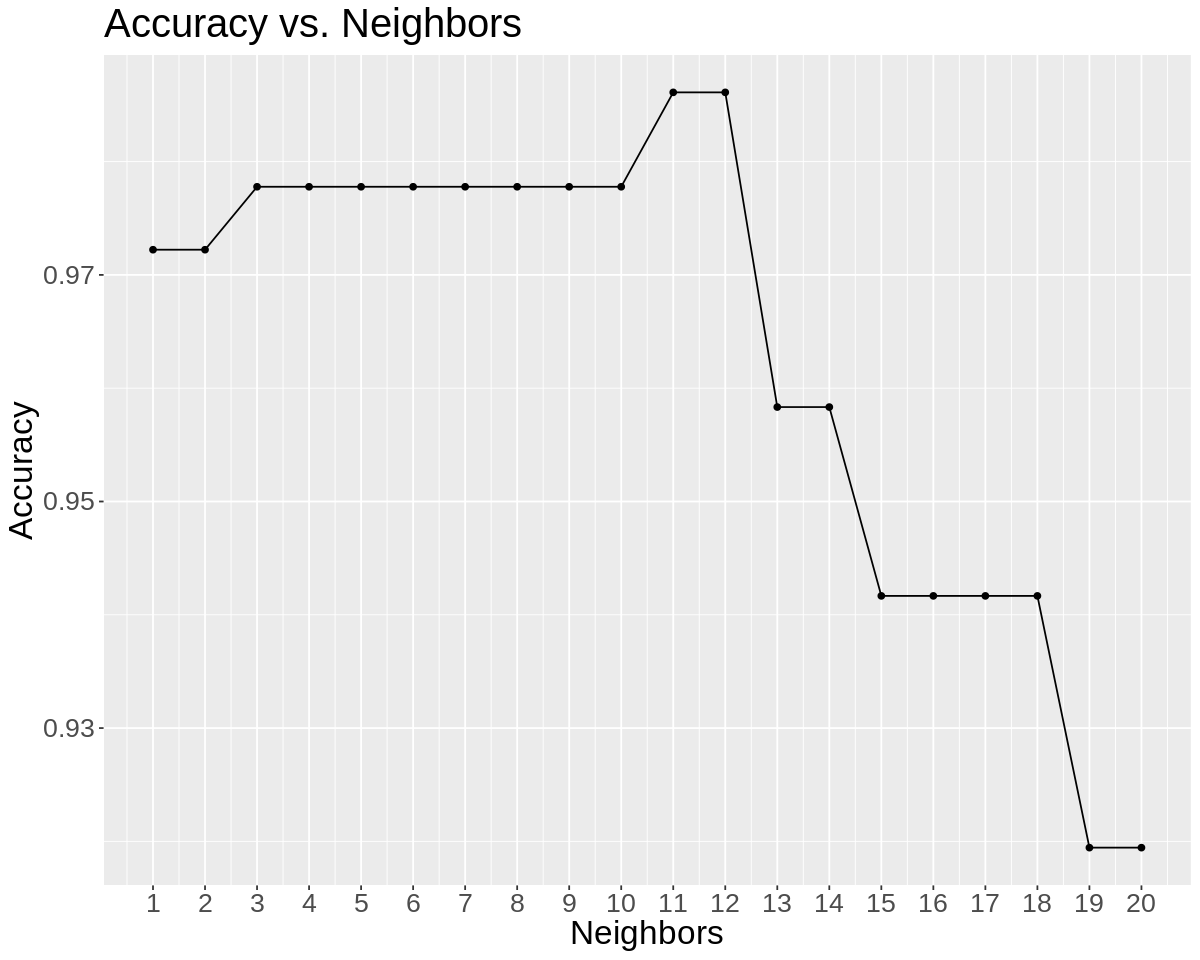

In [13]:
#Plot of accuracy vs. neighbors  
star_accuracy_plot <- star_summary %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() +
    geom_line() +
    ggtitle("Accuracy vs. Neighbors") +
    labs(x = "Neighbors", y = "Accuracy") +
    theme(text = element_text(size = 20)) +
    scale_x_continuous(breaks = 1:20)

star_accuracy_plot

**Figure 6**

In [14]:
#Best K value
k_min <- star_summary %>%
    arrange(desc(mean)) %>% 
    slice(1) %>%
    select(neighbors) %>%
    pull()

k_min

[1] 11

In [15]:
#Retrained model with new k value 
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
    set_engine("kknn") %>%
    set_mode("classification") 

star_best_accuracy <- workflow() %>%
    add_recipe(star_recipe) %>%
    add_model(knn_best_spec) %>%
    fit_resamples(resamples = star_vfold) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

star_best_accuracy

.metric,.estimator,mean,n,std_err
<chr>,<chr>,<dbl>,<int>,<dbl>
accuracy,multiclass,0.9861111,10,0.009487917


**Table 3**

In [16]:
star_best_fit <- workflow() %>%
    add_recipe(star_recipe) %>%
    add_model(knn_best_spec) %>%
    fit(data = star_train) 

star_predictions <- star_best_fit %>%
    predict(star_test) %>%
    bind_cols(star_test)

In [17]:
star_metrics <- star_predictions %>%
    metrics(truth = star_type, estimate = .pred_class) %>%
    filter(.metric == "accuracy")

star_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9479167


**Table 4**

In [18]:
star_conf_mat <- star_predictions %>%
    conf_mat(truth = star_type, estimate = .pred_class)

star_conf_mat

               Truth
Prediction      Brown Dwarf Red Dwarf White Dwarf Main Sequence Super Giant
  Brown Dwarf            16         4           0             0           0
  Red Dwarf               0        12           0             0           0
  White Dwarf             0         0          16             0           0
  Main Sequence           0         0           0            15           0
  Super Giant             0         0           0             1          16
  Hyper Giant             0         0           0             0           0
               Truth
Prediction      Hyper Giant
  Brown Dwarf             0
  Red Dwarf               0
  White Dwarf             0
  Main Sequence           0
  Super Giant             0
  Hyper Giant            16

**Table 5**

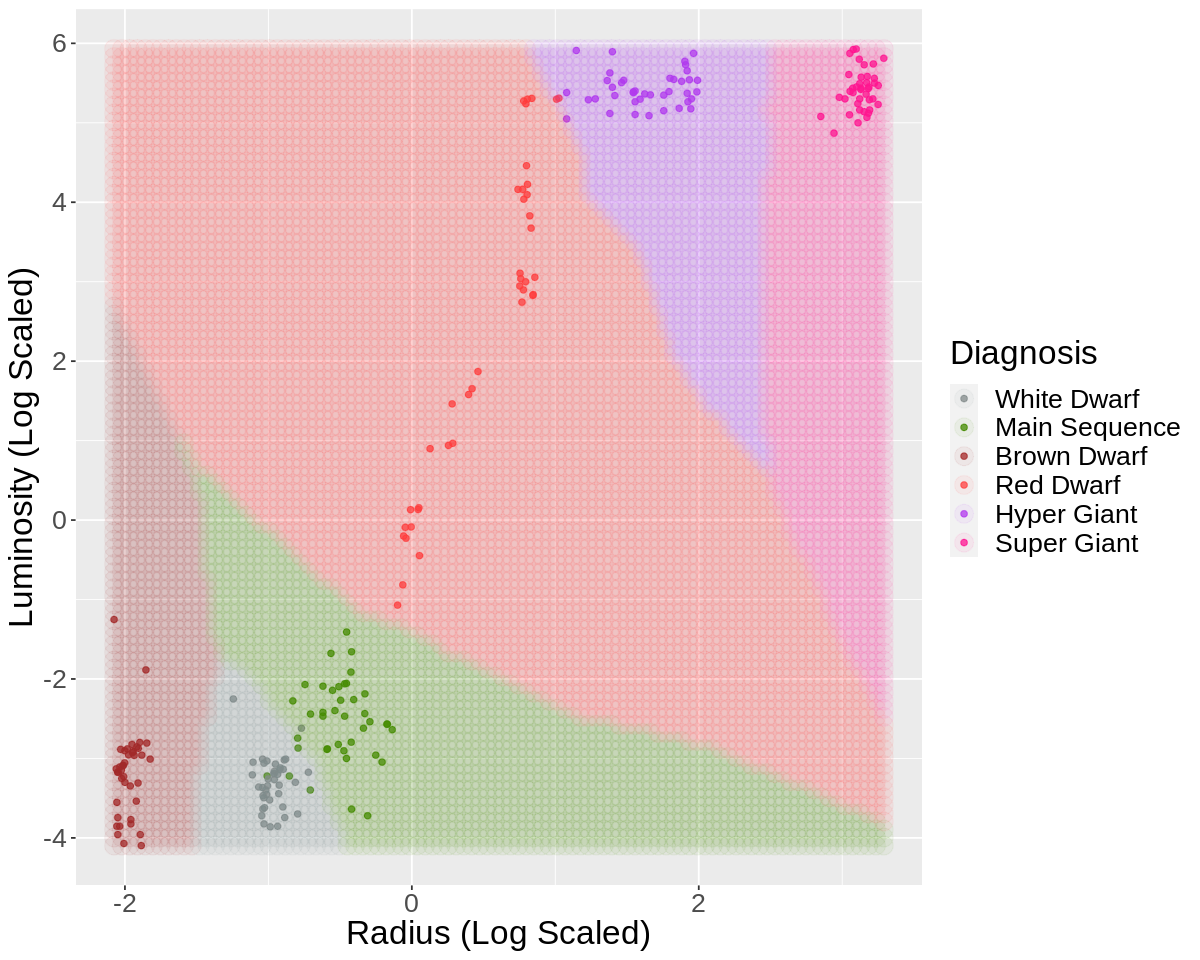

In [19]:
# create the grid of area/smoothness vals, and arrange in a data frame
lum_grid <- seq(min(star_data$luminosity), 
                max(star_data$luminosity), 
                length.out = 100)
rad_grid <- seq(min(star_data$radius), 
                max(star_data$radius), 
                length.out = 100)
asgrid <- tibble(expand.grid(luminosity = lum_grid, 
                                radius = rad_grid))

star_final_fit <- workflow() %>%
    add_recipe(star_recipe) %>%
    add_model(knn_best_spec) %>%
    fit(data = star_train)

knnPredGrid <- predict(star_final_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) %>%
  rename(Class = .pred_class)

# plot:
# 1. the colored scatter of the original data
# 2. the faded colored scatter for the grid point
wkflw_plot <-
  ggplot() +
  geom_point(data = star_data, 
             mapping = aes(x = radius, 
                           y = luminosity, 
                          color = star_type), 
             alpha = 0.75) +
  geom_point(data = prediction_table, 
             mapping = aes(x = radius, 
                           y = luminosity, 
                           color = Class), 
             alpha = 0.06, 
             size = 5) +
  labs(color = "Diagnosis", 
       x = "Radius (Log Scaled)", 
       y = "Luminosity (Log Scaled)") +
  scale_color_manual(labels = c("White Dwarf", "Main Sequence", "Brown Dwarf", "Red Dwarf", "Hyper Giant", "Super Giant"), 
                     values = c("azure4", "chartreuse4", "brown", "brown1", "darkorchid2", "deeppink1")) +
theme(text = element_text(size = 20))

wkflw_plot

**Figure 7**

In [20]:
star_accuracy <- star_best_fit %>%
    predict(star_test) %>%
    bind_cols(star_test) %>%
    mutate(prediction = ifelse(.pred_class == star_type, "correct", "incorrect")) %>%
    group_by(star_type, prediction) %>%
    summarize(n = n())

star_accuracy

`summarise()` regrouping output by 'star_type' (override with `.groups` argument)



star_type,prediction,n
<fct>,<chr>,<int>
Brown Dwarf,correct,16
Red Dwarf,correct,12
Red Dwarf,incorrect,4
White Dwarf,correct,16
Main Sequence,correct,15
Main Sequence,incorrect,1
Super Giant,correct,16
Hyper Giant,correct,16


**Table 6**

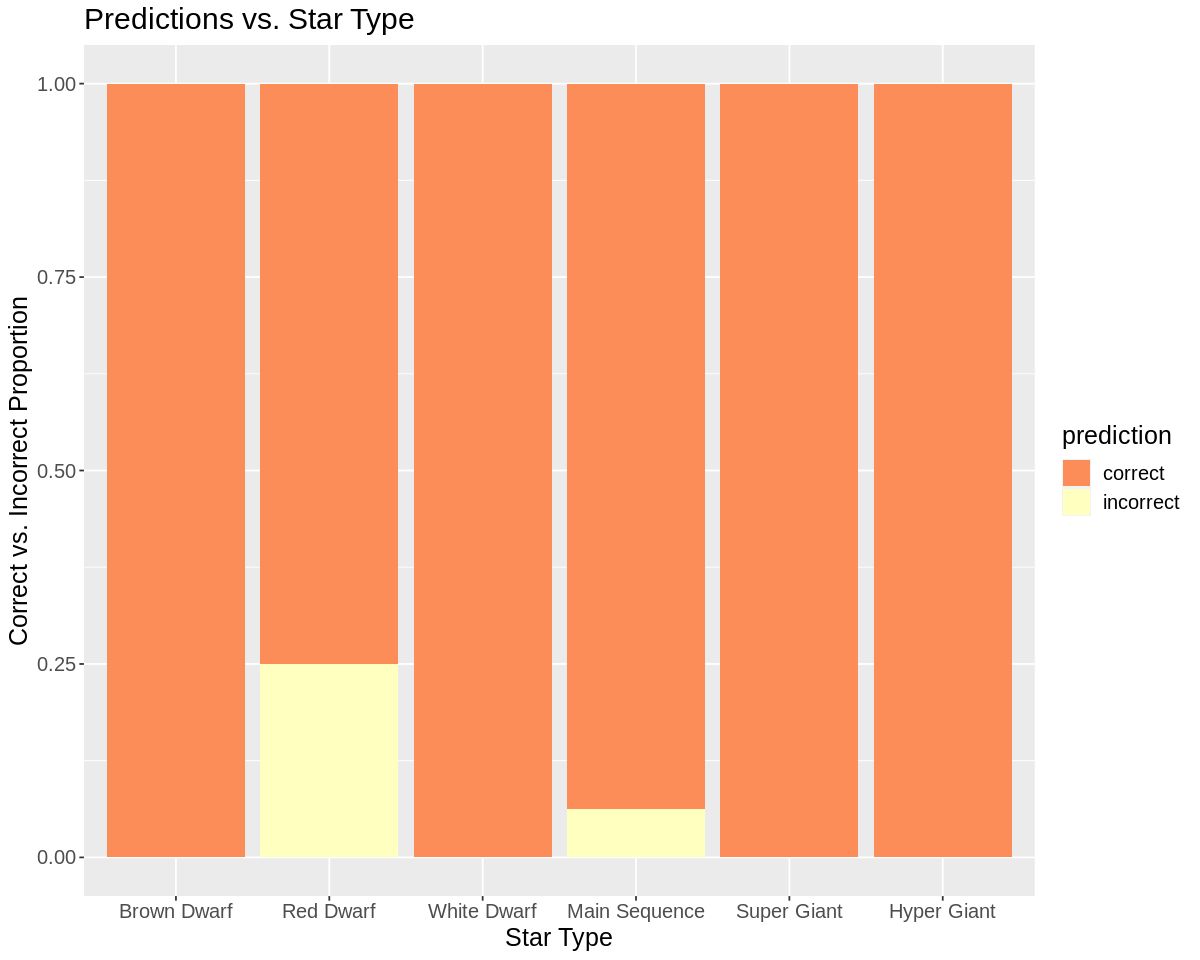

In [21]:
star_accuracy_plot <- star_accuracy %>%
    ggplot(aes(x = star_type, y = n, fill = prediction)) +
    geom_bar(stat = "identity", position = "fill") +
    scale_fill_brewer(palette = "RdYlBu") +
    ggtitle("Predictions vs. Star Type") +
    labs(x = "Star Type", y = "Correct vs. Incorrect Proportion", color = "Predictions") +
    theme(text = element_text(size = 15))

star_accuracy_plot

**Figure 8**